In [1]:
!nvidia-smi

Fri Mar  6 17:10:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
!pip install matplotlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,818 kB of archives.
After this operation, 7,685 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd

In [3]:
!git clone https://github.com/tensorflow/models.git
!pip install -q contextlib2
!pip install -q pycocotools

Cloning into 'models'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 32540 (delta 2), reused 12 (delta 1), pack-reused 32525
Receiving objects: 100% (32540/32540), 511.82 MiB | 38.25 MiB/s, done.
Resolving deltas: 100% (20834/20834), done.
Checking out files: 100% (2486/2486), done.


In [4]:
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

!python object_detection/builders/model_builder_test.py

/content/models/research
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_experimental_model
[       OK ] ModelBuilderTest.test_create_experimental_model
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_f

In [0]:
!mkdir /content/garbage_detection/
!mv /content/label_map.pbtxt /content/garbage_detection/
!mv /content/generate_tfrecord.py /content/garbage_detection/
!mv /content/train_labels.csv /content/garbage_detection/
!mv /content/test_labels.csv /content/garbage_detection/
!mv /content/pipeline_orig.config /content/garbage_detection/pipeline.config

In [0]:
!mkdir /content/garbage_detection/data

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
%cd /content
!cp drive/My\ Drive/garbage_dataset.zip .

/content


In [9]:
!unzip /content/garbage_dataset.zip
!mv /content/garbage_dataset /content/garbage_detection/data/garbage_dataset

Archive:  /content/garbage_dataset.zip
   creating: garbage_dataset/
  inflating: garbage_dataset/398faec8-6799-11e5-8dc4-40f2e96c8ad8.jpg  
  inflating: garbage_dataset/495f1dca-6799-11e5-8dc4-40f2e96c8ad8.jpg  
  inflating: garbage_dataset/47e1b9a8-6799-11e5-8dc4-40f2e96c8ad8.jpg  
  inflating: garbage_dataset/4c3d9cb0-6799-11e5-8dc4-40f2e96c8ad8.jpg  
  inflating: garbage_dataset/4c6794ac-6799-11e5-8dc4-40f2e96c8ad8.jpg  
  inflating: garbage_dataset/894d0654-6799-11e5-8dc4-40f2e96c8ad8.jpg  
  inflating: garbage_dataset/8c1b5552-6799-11e5-8dc4-40f2e96c8ad8.jpg  
  inflating: garbage_dataset/8d1faf66-6799-11e5-8dc4-40f2e96c8ad8.jpg  
  inflating: garbage_dataset/4c942aee-6799-11e5-8dc4-40f2e96c8ad8.jpg  
  inflating: garbage_dataset/911108a4-6799-11e5-ba3c-40f2e96c8ad8.jpg  
  inflating: garbage_dataset/9282d0c8-6799-11e5-ba3c-40f2e96c8ad8.jpg  
  inflating: garbage_dataset/92cc9866-6799-11e5-ba3c-40f2e96c8ad8.jpg  
  inflating: garbage_dataset/92ff7cae-6799-11e5-ba3c-40f2e96c8ad8.j

In [10]:
%cd /content/garbage_detection
!python generate_tfrecord.py --csv_input=train_labels.csv --output_path=train.record --img_path=data/garbage_dataset --label_map=label_map.pbtxt
!python generate_tfrecord.py --csv_input=test_labels.csv --output_path=test.record --img_path=data/garbage_dataset --label_map=label_map.pbtxt 

/content/garbage_detection


W0306 17:14:31.801009 140655141115776 module_wrapper.py:139] From generate_tfrecord.py:107: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0306 17:14:31.820683 140655141115776 module_wrapper.py:139] From /content/models/research/object_detection/utils/label_map_util.py:138: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/garbage_detection/train.record


W0306 17:14:35.997669 140606456481664 module_wrapper.py:139] From generate_tfrecord.py:107: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0306 17:14:36.004110 140606456481664 module_wrapper.py:139] From /content/models/research/object_detection/utils/label_map_util.py:138: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/garbage_detection/test.record


In [0]:
test_record_fname = '/content/garbage_detection/test.record'
train_record_fname = '/content/garbage_detection/train.record'
label_map_pbtxt_fname = '/content/garbage_detection/label_map.pbtxt'

In [12]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz

--2020-03-06 17:14:40--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.143.128, 2a00:1450:4013:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.143.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M  94.9MB/s    in 1.9s    

2020-03-06 17:14:42 (94.9 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]



In [13]:
!tar -xzvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

ssd_mobilenet_v2_coco_2018_03_29/checkpoint
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
ssd_mobilenet_v2_coco_2018_03_29/saved_model/
ssd_mobilenet_v2_coco_2018_03_29/saved_model/variables/
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.index
ssd_mobilenet_v2_coco_2018_03_29/
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.data-00000-of-00001


In [14]:
fine_tune_checkpoint = "/content/garbage_detection/ssd_mobilenet_v2_coco_2018_03_29/model.ckpt"
fine_tune_checkpoint

'/content/garbage_detection/ssd_mobilenet_v2_coco_2018_03_29/model.ckpt'

In [15]:
%cd /content
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

/content
--2020-03-06 17:14:48--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.194.73.153, 3.225.84.43, 34.235.56.240, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.194.73.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  14.2MB/s    in 0.9s    

2020-03-06 17:14:49 (14.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
# %cd /content/
# !cp -r drive/My\ Drive/training_logs .
# !cp -r drive/My\ Drive/trained_model .

In [0]:
# !mkdir training_logs
get_ipython().system_raw(
    'tensorboard --logdir /content/drive/My\ Drive/training_logs_orig --host 0.0.0.0 --port 6006 &'
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [19]:
! curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://e9583a46.ngrok.io


In [0]:
%cd /content
!python /content/models/research/object_detection/model_main.py \
    --pipeline_config_path=garbage_detection/pipeline.config \
    --model_dir=drive/My\ Drive/training_logs_orig \
    --alsologtostderr \
    --num_train_steps=40000 \
    --num_eval_steps=100

/content
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0306 17:15:03.186120 140617040418688 module_wrapper.py:139] From /content/models/research/object_detection/utils/config_util.py:102: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0306 17:15:03.189480 140617040418688 module_wrapper.py:139] From /content/models/research/object_detection/model_lib.py:628: The name tf.logging.warning is deprecated. Please use tf.compat.v1.logging.warning instead.

W0306 17:15:03.189648 140617040418688 model_lib.py:629] Forced number of epochs for all eval validations to be 1.

W0306 17:15:03.189782 140617040418688 module_wrapper.py:139] From /content/mod

In [0]:
# !cp -r training_logs/ drive/My\ Drive/

In [0]:
%cd /content
!mkdir trained_model
!rm -rf trained_model/saved_model/*

/content
mkdir: cannot create directory ‘trained_model’: File exists


In [0]:
%cd /content
!python /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=garbage_detection/pipeline.config \
    --output_directory=trained_model \
    --trained_checkpoint_prefix=training_logs/model.ckpt-12530

/content
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





W1130 19:00:07.545768 139917095376768 module_wrapper.py:139] From /content/models/research/object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W1130 19:00:07.551577 139917095376768 module_wrapper.py:139] From /content/models/research/object_detection/exporter.py:402: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W1130 19:00:07.551817 139917095376768 module_wrapper.py:139] From /content/models/research/object_detection/exporter.py:121: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeho

In [0]:
!wget https://github.com/tensorflow/models/raw/master/research/object_detection/export_tflite_ssd_graph.py
!wget https://github.com/opencv/opencv/raw/master/samples/dnn/tf_text_graph_ssd.py
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/tf_text_graph_common.py

--2019-11-30 19:00:19--  https://github.com/tensorflow/models/raw/master/research/object_detection/export_tflite_ssd_graph.py
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/export_tflite_ssd_graph.py [following]
--2019-11-30 19:00:19--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/export_tflite_ssd_graph.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5850 (5.7K) [text/plain]
Saving to: ‘export_tflite_ssd_graph.py’

export_tflite_ssd_g 100%[===================>]   5.71K  --.-KB/s    in 0s      

2019-11-30 

In [0]:
%cd /content
!mkdir tflite_out
!python3 export_tflite_ssd_graph.py --pipeline_config_path=trained_model/pipeline.config --trained_checkpoint_prefix=trained_model/model.ckpt --output_directory=tflite_out/ --add_postprocessing_op=true

/content
mkdir: cannot create directory ‘tflite_out’: File exists
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





W1130 19:00:36.879245 140237237774208 module_wrapper.py:139] From export_tflite_ssd_graph.py:133: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W1130 19:00:36.882533 140237237774208 module_wrapper.py:139] From /content/models/research/object_detection/export_tflite_ssd_graph_lib.py:193: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W1130 19:00:36.882774 140237237774208 module_wrapper.py:139] From /content/models/research/object_detection/export_tflite_ssd_graph_lib.py:237: The name tf.plac

In [0]:
!tflite_convert \
  --output_file=tflite_out/detect_garbage.tflite \
  --graph_def_file=tflite_out/tflite_graph.pb \
  --input_arrays=normalized_input_image_tensor \
  --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
  --input_shape=1,300,300,3 \
  --inference_type=FLOAT \
  --allow_custom_ops

2019-11-30 19:00:46.286588: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-11-30 19:00:46.289432: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-11-30 19:00:46.289943: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2019-11-30 19:00:46.290190: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2019-11-30 19:00:46.292560: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2019-11-30 19:00:46.294981: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuf

In [0]:
%cd /content
!python3 tf_text_graph_ssd.py --input trained_model/frozen_inference_graph.pb --config trained_model/pipeline.config --output trained_model/graph.pbtxt

/content
Scale: [0.200000-0.950000]
Aspect ratios: [1.0, 2.0, 0.5, 3.0, 0.33329999]
Reduce boxes in the lowest layer: True
Number of classes: 1
Number of layers: 6
box predictor: convolutional
Input image size: 300x300
Instructions for updating:
Use tf.gfile.GFile.

2019-11-30 19:00:52.923021: I tensorflow/tools/graph_transforms/transform_graph.cc:317] Applying sort_by_execution_order



In [0]:
# !zip -r trained_model.zip trained_model/
!cp -r /content/trained_model/ /content/drive/My\ Drive/
!cp -r /content/tflite_out/ /content/drive/My\ Drive/

In [0]:
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = "/content/trained_model/frozen_inference_graph.pb"

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = "/content/garbage_detection/label_map.pbtxt"

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  "/content/garbage_detection/data/garbage_dataset"

# assert os.path.isfile(pb_fname)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.jpg"))[-8:]
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

['/content/garbage_detection/data/garbage_dataset/15320f44-679e-11e5-8121-40f2e96c8ad8.jpg', '/content/garbage_detection/data/garbage_dataset/611fb088-679d-11e5-90f4-40f2e96c8ad8.jpg', '/content/garbage_detection/data/garbage_dataset/6e79f648-679e-11e5-990f-40f2e96c8ad8.jpg', '/content/garbage_detection/data/garbage_dataset/3706a080-679e-11e5-990f-40f2e96c8ad8.jpg', '/content/garbage_detection/data/garbage_dataset/c41226ae-67a1-11e5-b4c6-40f2e96c8ad8.jpg', '/content/garbage_detection/data/garbage_dataset/d300faf8-6799-11e5-ba3c-40f2e96c8ad8.jpg', '/content/garbage_detection/data/garbage_dataset/a4a550bc-67a0-11e5-a3d2-40f2e96c8ad8.jpg', '/content/garbage_detection/data/garbage_dataset/1577f0a8-679f-11e5-b0e3-40f2e96c8ad8.jpg']


/content/models/research/object_detection


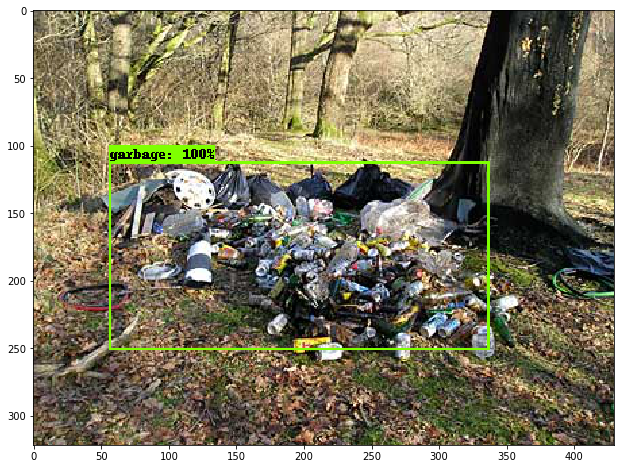

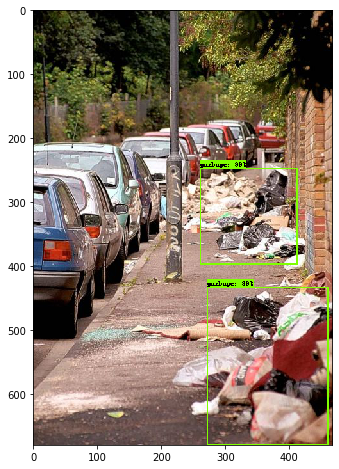

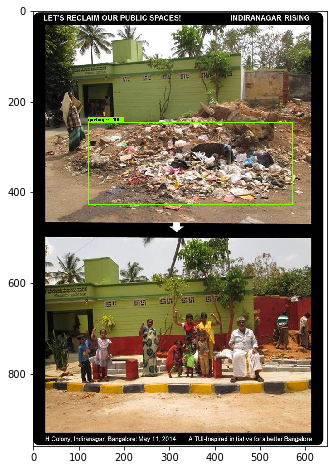

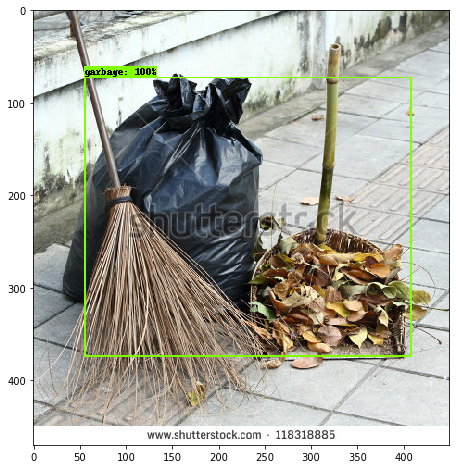

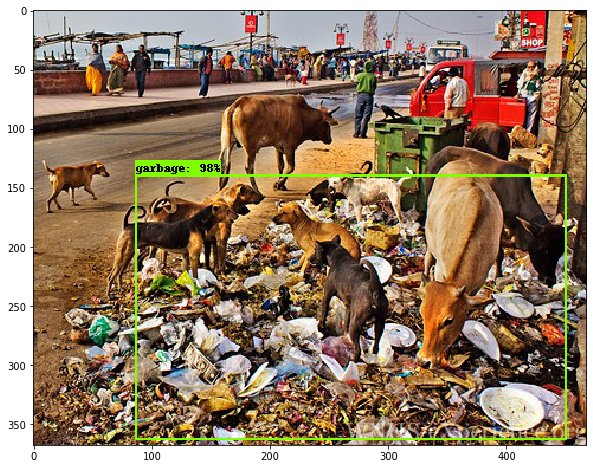

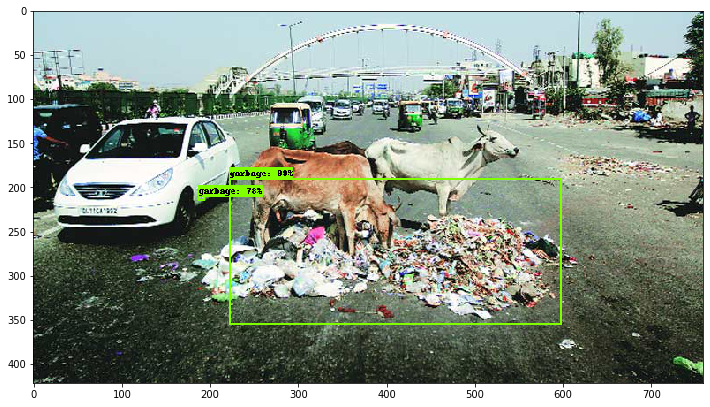

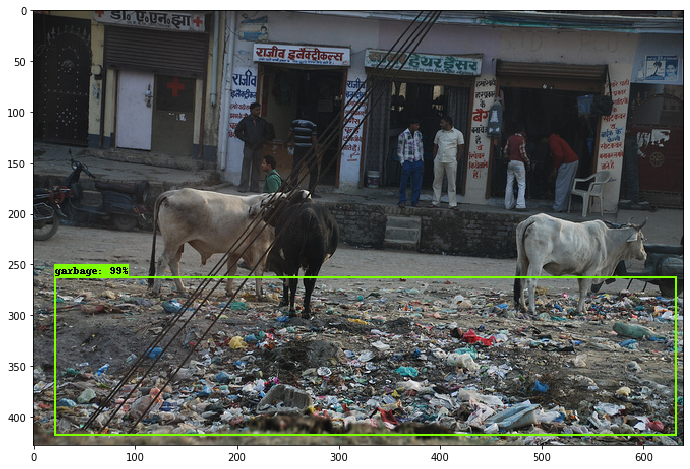

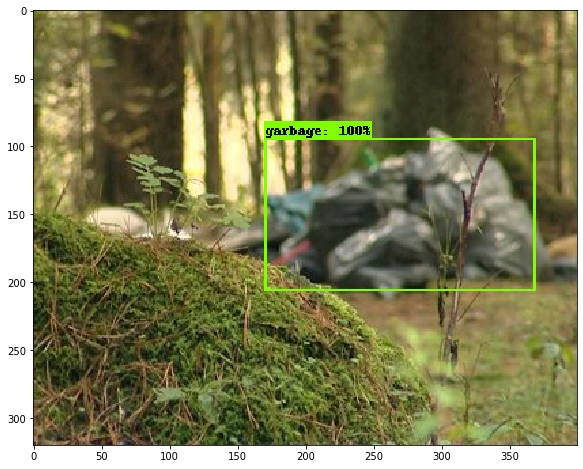

In [0]:
%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

num_classes=1

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict


for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=2)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)